# Entrega P1
###### Luis Martín Pérez, Andrea Santana López
---

Se importan las librerías

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

### 1 - Tablero de Ajedrez

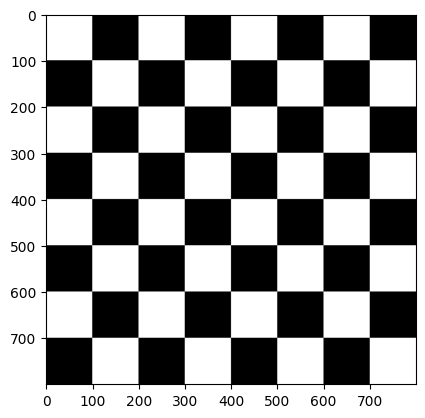

In [ ]:
board_size = 800

# Se divide la imagen en una cuadrícula 8 x 8
cell_number = 8
cell_size = int(board_size / cell_number)

# Se inicializa la imagen
chess_board_img = np.zeros((board_size, board_size, 1), dtype=np.uint8)

for row in range(cell_number):
    for column in range(0, cell_number, 2):
        cell_x = row * cell_size
        # En las rows impares se rueda una posición a la derecha
        cell_y = (column + row%2) * cell_size
        # Pintamos las cuadrículas de las columns pares en blanco
        chess_board_img[cell_x:cell_x + cell_size, cell_y:cell_y + cell_size, 0] = 255

# Mostrar imagen de escala de grises
plt.imshow(chess_board_img, cmap='gray',vmin=0, vmax=255)

### 2 - Imagen estilo ***Mondrian***

True

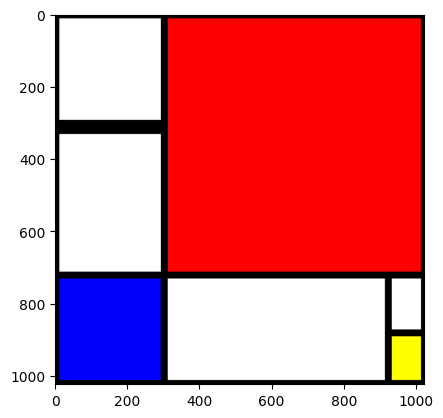

In [12]:
mondrian_size = 1024

# Se divide la imagen en una cuadrícula de 50 x 50
divisions = 50
division_size = int(mondrian_size / divisions)
# El resto de la division se pone como margen para centrar la cuadrícula
margin = int(mondrian_size % divisions / 2)

mondrian_img = np.zeros((mondrian_size, mondrian_size, 3), dtype=np.uint8)

# Estructura de datos para simplificar el diseño
class Rectangle:
    def __init__(self, x, y, end_x, end_y, color):
        self.x = x
        self.y = y
        self.end_x = end_x
        self.end_y = end_y
        self.color = color

rectangles = [
    Rectangle(15,0,50,35,(255,0,0)),
    Rectangle(0,0,14,14,(255,255,255)),
    Rectangle(0,16,14,35,(255,255,255)),
    Rectangle(0,36,14,50,(0,0,255)),
    Rectangle(15,36,45,50,(255,255,255)),
    Rectangle(46,36,50,43,(255,255,255)),
    Rectangle(46,44,50,50,(255,255,0)),
]

# Dentro del bucle se transforman las coordenadas de la cuadrícula a las de la imagen
for r in rectangles:
    start_x = r.x * division_size + margin
    start_y = r.y * division_size + margin
    width = r.end_x - r.x
    height = r.end_y - r.y
    cv2.rectangle(mondrian_img,(start_x ,start_y), (start_x + division_size * width, start_y + division_size * height), r.color,-1)


plt.imshow(mondrian_img)

# Se guarda la imagen en disco para venderla
bgr_img = cv2.cvtColor(mondrian_img, cv2.COLOR_BGR2RGB)
cv2.imwrite('mondrian.jpg', bgr_img)

### 3 - Modificar los planos de color

In [ ]:
vid = cv2.VideoCapture(0)

while(True):
    # fotograma a fotograma
    ret, frame = vid.read()

    if ret:
        # Se redimensiona la captura de la cámara para hacer un collage
        h, w, c = frame.shape
        new_size = (int(w*0.6),int(h/2))
        new_size_rgb = (new_size[1], new_size[0], 3)
        frame = cv2.resize(frame, new_size, cv2.INTER_NEAREST)

        # Separamos canales de color
        b = frame[:,:,0]
        g = frame[:,:,1]
        r = frame[:,:,2]

        # Se inicializan los recuadros correspondientes
        red = np.zeros(new_size_rgb, dtype = np.uint8)
        blue = np.zeros(new_size_rgb, dtype = np.uint8)
        green = np.zeros(new_size_rgb, dtype = np.uint8)

        yellow = np.zeros(new_size_rgb, dtype = np.uint8)
        magenta = np.zeros(new_size_rgb, dtype = np.uint8)
        cyan = np.zeros(new_size_rgb, dtype = np.uint8)

        invert_red = np.zeros(new_size_rgb, dtype = np.uint8)
        invert_green = np.zeros(new_size_rgb, dtype = np.uint8)
        invert_blue = np.zeros(new_size_rgb, dtype = np.uint8)

        creepy_1 = np.zeros(new_size_rgb, dtype = np.uint8)
        creepy_2 = np.zeros(new_size_rgb, dtype = np.uint8)
        creepy_3 = np.zeros(new_size_rgb, dtype = np.uint8)

        # Se separan los planos RGB
        red[:,:,2] = r
        green[:,:,1] = g
        blue[:,:,0] = b

        # Se crean los colores primarios del esquema de color CMY
        yellow[:,:,2] = r
        yellow[:,:,1] = g

        magenta[:,:,2] = r
        magenta[:,:,0] = b

        cyan[:,:,1] = g
        cyan[:,:,0] = b

        # Se invierte cada canal de color
        invert_red[:,:,2] = 255 - r
        invert_red[:,:,1] = g
        invert_red[:,:,0] = b

        invert_green[:,:,2] = r
        invert_green[:,:,1] = 255 - g
        invert_green[:,:,0] = b

        invert_blue[:,:,2] = r
        invert_blue[:,:,1] = g
        invert_blue[:,:,0] = 255 - b

        # Experimentando para obtener imágenes espeluznantes
        creepy_1[:,:,2] = 140 - r
        creepy_1[:,:,1] = b/3
        creepy_1[:,:,0] = 0

        creepy_2[:,:,2] = 60 - b
        creepy_2[:,:,1] = 0
        creepy_2[:,:,0] = g

        creepy_3[:,:,2] = 255 - b
        creepy_3[:,:,1] = 60 - r
        creepy_3[:,:,0] = 30 - g


        # Se crean las rows
        rgb_collage = np.hstack((red, green, blue))
        ymc_collage = np.hstack((yellow, magenta, cyan))
        invert_collage = np.hstack((invert_red, invert_green, invert_blue))
        creepy_collage = np.hstack((creepy_1, creepy_2, creepy_3))

        # Se finaliza el collage agrupando en vertical
        collage = np.vstack((rgb_collage, ymc_collage, invert_collage, creepy_collage))

        cv2.imshow('Color planes', collage)

    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break

vid.release()
cv2.destroyAllWindows()

### 4 - Encontrar el punto más clear y más oscuro de una imagen

[255 255 255]
[0 1 0]


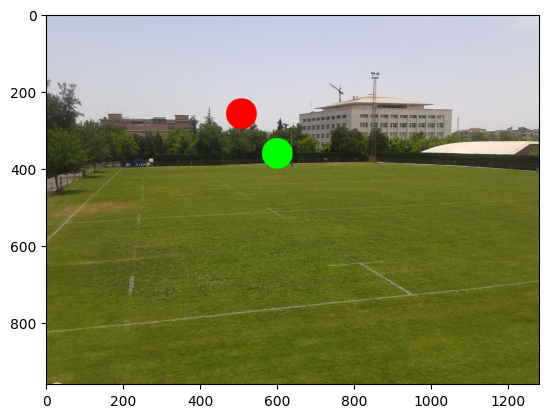

In [ ]:

image =cv2.cvtColor((cv2.imread("./test-images/CAMPO.jpg", cv2.IMREAD_COLOR)),cv2.COLOR_BGR2RGB)
total_value_darkest_pixel_image,total_value_clearest_pixel_image = np.array([255, 255, 255], dtype=np.int32),np.array([0, 0, 0], dtype=np.int32)
coordenate_the_darkest_pixel_image,coordenate_the_clearest_pixel_coordenate_image=[0,0],[0,0]

for row in range(0,image.shape[0]):
    for column in range(0,image.shape[1]):
          pixel = image[row, column].astype(np.int32)
          if np.sum(pixel) > np.sum(total_value_clearest_pixel_image):
            total_value_clearest_pixel_image = pixel
            coordenate_the_clearest_pixel_image = [row, column]
          if np.sum(pixel) < np.sum(total_value_darkest_pixel_image):
            total_value_darkest_pixel_image = pixel
            coordenate_the_darkest_pixel_image = [row, column]



image = image.astype(np.uint8)
cv2.circle(image, (coordenate_the_clearest_pixel_image[1], coordenate_the_clearest_pixel_image[0]), 40, color=(255, 0, 0), thickness=-1)
cv2.circle(image, (coordenate_the_darkest_pixel_image[1], coordenate_the_darkest_pixel_image[0]), 40, color=(0, 255, 0), thickness=-1)
plt.imshow(image)
plt.show()


### 5 - Propuesta Pop-Art

Primero se cargan las texturas de cada bloque y su color más representativo

In [3]:
minecraft_block_size = 16
minecraft_block_data = []

def average_color(img):
    return tuple(np.mean(img, axis=(0,1)).astype(int))

def calculate_distance(color, rgb):
    return np.sqrt((color[0] - rgb[0])**2 + (color[1] - rgb[1])**2 + (color[2] - rgb[2])**2)

# Se recorre las texturas y devuelve la del color más parecido
def find_nearest_texture(color):
    best_match = minecraft_block_data[0][3]
    min_distance = calculate_distance(color, minecraft_block_data[0])
    for block in minecraft_block_data:
        distance = calculate_distance(color, block[0:3])
        if distance < min_distance:
            min_distance = distance
            best_match = block[3]
    return best_match

# Cargar texturas y clasificarlas según su color más prominente
texture_folder = "textures/"

for filename in os.listdir(texture_folder):
    if filename.endswith(".png"):
        path = os.path.join(texture_folder, filename)
        texture_img = cv2.imread(path)
        minecraft_block_data.append((*average_color(texture_img), texture_img))


Se coge la entrada de la cámara, se divide entre el tamaño de las texturas y se reemplaza cada pixel por la textura que más se le parezca

In [4]:
vid = cv2.VideoCapture(0)

while(True):
    ret, frame = vid.read()

    if ret:
        h, w, c = frame.shape
        minecraft_rows = int(h/minecraft_block_size)
        minecraft_columns = int(w/minecraft_block_size)

        # Se cambia la resolución para obtener el efecto de pixel art, para ello se interpola con el vecino más cercano
        downscaled_img = cv2.resize(frame, (minecraft_columns, minecraft_rows), interpolation=cv2.INTER_NEAREST)

        # Se crea una nueva imagen con el tamaño original
        minecraft_img = np.zeros((h, w, 3), dtype=np.uint8)

        # Se rellena en un área 16x16 con la textura de minecraft del color más parecido
        for x in range(minecraft_rows):
            for y in range(minecraft_columns):
                minecraft_img[x*minecraft_block_size:x*minecraft_block_size + minecraft_block_size, y*minecraft_block_size:y*minecraft_block_size + minecraft_block_size] = find_nearest_texture(downscaled_img[x][y])

        # Se crea muestra la cámara original a la izquierda
        collage = np.hstack((frame, minecraft_img))
        cv2.imshow('Minecraft Cam', collage)

    if cv2.waitKey(20) == 27:
        break

vid.release()
cv2.destroyAllWindows()